In [7]:
from nodes.intake_node import extract_claim_info
from state import State
from nodes.risk_analyze_node import risk_assessment_agent
from nodes.routing_node import routing_node

from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
 


def mock_node(state: State):
    return state



graph = StateGraph(State)

graph.add_node("Intake Node", extract_claim_info)
graph.add_node("Risk Analyze Node", risk_assessment_agent)
graph.add_node("Routing Node", routing_node)
graph.add_node("Orchestrator", mock_node)




def orchestrator(state: State):

    if not state.get("claim_Extracted"):
        return "Intake Node"
    
    if not state.get("risk_assessment_report"):
        return "Risk Analyze Node"

    if not state.get("routing_decision_report"):
        return "Routing Node"

    return END



graph.add_edge(START, "Orchestrator")
graph.add_conditional_edges("Orchestrator", orchestrator, {
    "Intake Node" : "Intake Node",
    "Risk Analyze Node" : "Risk Analyze Node",
    "Routing Node" : "Routing Node",
    END: END
})
graph.add_edge("Intake Node", "Orchestrator")
graph.add_edge("Risk Analyze Node", "Orchestrator")
graph.add_edge("Routing Node", "Orchestrator")


checkpointer = InMemorySaver()
app = graph.compile(checkpointer=checkpointer)

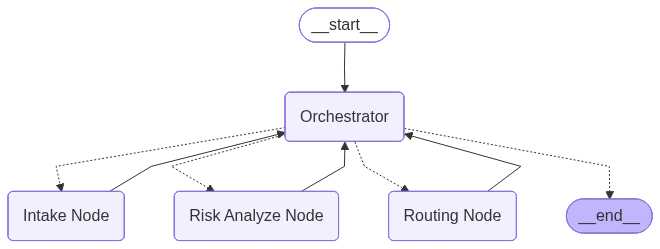

In [8]:
app